In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Load the dataset
data = pd.read_excel('Consumptions.xlsx')

In [3]:
data.shape

(306, 22)

In [4]:
data.head()

,Date,Kinitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Electricity (kWh),Steam (kg),Total Water (Cu.m.) main meter + common
0,2024-01-01,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1105,-,-
1,2024-01-02,-,-,-,-,-,-,-,-,-,...,1,5,6,2,3,0,9,19118,50189,713
2,2024-01-15,36,30,-,38,2,-,6,-,-,...,1,5,4,2,2,3,3,18897,44268,437
3,2024-01-24,9,9,37,37,-,-,-,-,-,...,1,1,4,1,1,1,1,11195,84619,1064
4,2024-01-25,11,3,36,34,-,-,-,-,-,...,1,3,2,1,1,1,1,11593,85820,1023


In [5]:
data.isnull().sum()

Date                                        0
Kinitting - D                               0
Knitting - N                                0
Bulk Dye - D                                0
Bulk Dye - N                                0
Sample Dye - D                              0
Sample Dye - N                              0
Dryers - D                                  0
Dryers - N                                  0
Presetting - D                              0
Presetting - N                              0
Chillers - D                                0
Chillers - N                                0
AHU - D                                     0
AHU - N                                     0
Compressor - D                              0
Compressor - N                              0
Luwa - D                                    0
Luwa - N                                    0
Electricity (kWh)                           0
Steam (kg)                                  0
Total Water (Cu.m.) main meter + c

In [6]:
data.duplicated().sum()

0

In [7]:
# Data Cleaning
# Replace '-' with NaN and then fill NaNs with 0
data.replace('-', np.nan, inplace=True)

In [8]:
data.fillna(0, inplace=True)

In [9]:
data.head()

,Date,Kinitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Electricity (kWh),Steam (kg),Total Water (Cu.m.) main meter + common
0,2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,0.0,0.0
1,2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,6.0,2.0,3.0,0.0,9.0,19118.0,50189.0,713.0
2,2024-01-15,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,...,1.0,5.0,4.0,2.0,2.0,3.0,3.0,18897.0,44268.0,437.0
3,2024-01-24,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,1.0,1.0,1.0,1.0,11195.0,84619.0,1064.0
4,2024-01-25,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,1.0,11593.0,85820.0,1023.0


In [10]:
data.isnull().sum()

Date                                        0
Kinitting - D                               0
Knitting - N                                0
Bulk Dye - D                                0
Bulk Dye - N                                0
Sample Dye - D                              0
Sample Dye - N                              0
Dryers - D                                  0
Dryers - N                                  0
Presetting - D                              0
Presetting - N                              0
Chillers - D                                0
Chillers - N                                0
AHU - D                                     0
AHU - N                                     0
Compressor - D                              0
Compressor - N                              0
Luwa - D                                    0
Luwa - N                                    0
Electricity (kWh)                           0
Steam (kg)                                  0
Total Water (Cu.m.) main meter + c

In [11]:
# Summing day and night values for each machine type
data['Knitting'] = data['Kinitting - D'] + data['Knitting - N']
data['Bulk_Dye'] = data['Bulk Dye - D'] + data['Bulk Dye - N']
data['Sample_Dye'] = data['Sample Dye - D'] + data['Sample Dye - N']
data['Dryers'] = data['Dryers - D'] + data['Dryers - N']
data['Presetting'] = data['Presetting - D'] + data['Presetting - N']
data['Chillers'] = data['Chillers - D'] + data['Chillers - N']
data['AHU'] = data['AHU - D'] + data['AHU - N']
data['Compressor'] = data['Compressor - D'] + data['Compressor - N']
data['Luwa'] = data['Luwa - D'] + data['Luwa - N']

In [12]:
data.head()

,Date,Kinitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Total Water (Cu.m.) main meter + common,Knitting,Bulk_Dye,Sample_Dye,Dryers,Presetting,Chillers,AHU,Compressor,Luwa
0,2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,713.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,9.0
2,2024-01-15,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,...,437.0,66.0,38.0,2.0,6.0,0.0,2.0,9.0,4.0,6.0
3,2024-01-24,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1064.0,18.0,74.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0
4,2024-01-25,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1023.0,14.0,70.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0


In [13]:
columns_to_drop = [
    'Date', 'Kinitting - D', 'Knitting - N', 'Bulk Dye - D', 'Bulk Dye - N',
    'Sample Dye - D', 'Sample Dye - N', 'Dryers - D', 'Dryers - N', 'Presetting - D',
    'Presetting - N', 'Chillers - D', 'Chillers - N', 'AHU - D', 'AHU - N',
    'Compressor - D', 'Compressor - N', 'Luwa - D', 'Luwa - N', 'Electricity (kWh)', 'Steam (kg)'
]
data.drop(columns=columns_to_drop, inplace=True)

In [14]:
data.head()

,Total Water (Cu.m.) main meter + common,Knitting,Bulk_Dye,Sample_Dye,Dryers,Presetting,Chillers,AHU,Compressor,Luwa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,713.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,9.0
2,437.0,66.0,38.0,2.0,6.0,0.0,2.0,9.0,4.0,6.0
3,1064.0,18.0,74.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0
4,1023.0,14.0,70.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0


In [15]:
data = data[['Knitting', 'Bulk_Dye', 'Sample_Dye', 'Dryers',
             'Presetting', 'Chillers', 'AHU', 'Compressor', 'Luwa',
             'Total Water (Cu.m.) main meter + common ']]

In [16]:
data.head()

,Knitting,Bulk_Dye,Sample_Dye,Dryers,Presetting,Chillers,AHU,Compressor,Luwa,Total Water (Cu.m.) main meter + common
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,9.0,713.0
2,66.0,38.0,2.0,6.0,0.0,2.0,9.0,4.0,6.0,437.0
3,18.0,74.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0,1064.0
4,14.0,70.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0,1023.0


In [17]:
# Check the data types of each variable
print(data.dtypes)

Knitting                                    float64
Bulk_Dye                                    float64
Sample_Dye                                  float64
Dryers                                      float64
Presetting                                  float64
Chillers                                    float64
AHU                                         float64
Compressor                                  float64
Luwa                                        float64
Total Water (Cu.m.) main meter + common     float64
dtype: object


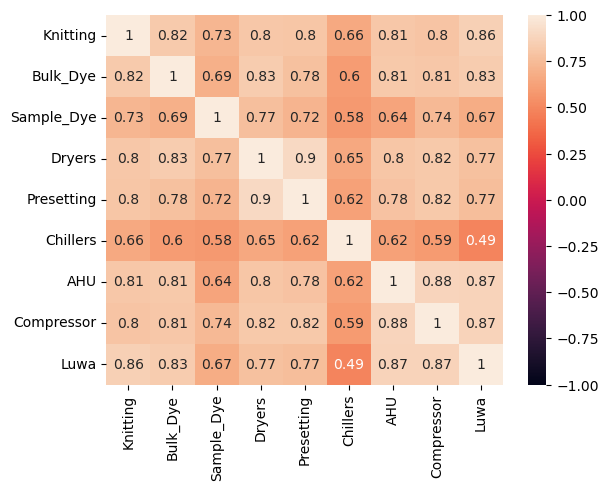

In [18]:
sns.heatmap(data[['Knitting', 'Bulk_Dye', 'Sample_Dye', 'Dryers',
             'Presetting', 'Chillers', 'AHU', 'Compressor', 'Luwa']].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [19]:
# Select features and target variable
features = data[['Knitting', 'Bulk_Dye', 'Sample_Dye', 'Dryers',
             'Presetting', 'Chillers', 'AHU', 'Compressor', 'Luwa']]
target = data['Total Water (Cu.m.) main meter + common ']

In [20]:
# Convert features and target to numeric to handle any remaining string issues
features = features.apply(pd.to_numeric)
target = pd.to_numeric(target)

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [22]:
# Model selection and training
# Here we use a Random Forest Regressor as an example
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 58.29660815541676
Root Mean Squared Error (RMSE): 75.29320249462967


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score (similar to accuracy):", r2)

Mean Absolute Error (MAE): 58.29660815541676
Root Mean Squared Error (RMSE): 75.29320249462967
R² Score (similar to accuracy): 0.963983257482188


In [25]:
import pandas as pd

# Define new input data as a dictionary
# Replace these values with the new inputs you want to test
new_data = {
    'Knitting': [278],
    'Bulk_Dye': [51],
    'Sample_Dye': [17],
    'Dryers': [16],
    'Presetting': [4],
    'Chillers': [5],
    'AHU': [9],
    'Compressor': [4],
    'Luwa': [12]
}

# Convert the dictionary to a DataFrame
new_input = pd.DataFrame(new_data)

# Predict using the best model
predicted_consumption = model.predict(new_input)

# Display the predicted result
print("Predicted Water Consumption (Cu.m.) for new input:", predicted_consumption[0])

Predicted Water Consumption (Cu.m.) for new input: 947.53


In [133]:
with open('./water_pkl.sav', 'wb') as file:
    pickle.dump(model, file)